In [1]:
#Importing necessary libraries

from sodapy import Socrata

# Data Manipulation and Visualization
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np



In [2]:
#To display all columns in notebook

pd.set_option('display.max_columns',None)

In [3]:
# Connecting to the Socrata API for the specified dataset on "data.montgomerycountymd.gov"

client = Socrata("data.montgomerycountymd.gov", None)
client.timeout = 1000
results = client.get("mmzv-x632", limit=200000)
data = pd.DataFrame.from_records(results)


In [4]:
#Five sample rows of the data.
data.sample(5)

,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,off_road_description,collision_type,weather,light,traffic_control,driver_substance_abuse,person_id,driver_at_fault,injury_severity,circumstance,driver_distracted_by,drivers_license_state,vehicle_id,vehicle_damage_extent,vehicle_first_impact_location,vehicle_second_impact_location,vehicle_body_type,vehicle_movement,vehicle_continuing_dir,vehicle_going_dir,speed_limit,driverless_vehicle,parked_vehicle,vehicle_year,:@computed_region_a9cs_3ed7,vehicle_make,:@computed_region_r648_kzwt,vehicle_model,:@computed_region_vu5j_pcmz,:@computed_region_tx5f_5em3,equipment_problems,latitude,:@computed_region_kbsp_ykn9,longitude,:@computed_region_d7bw_bq6x,geolocation,:@computed_region_rbt8_3x7n,:@computed_region_6vgr_duib,route_type,road_name,cross_street_type,cross_street_name,municipality,surface_condition,related_non_motorist,non_motorist_substance_abuse
159168,MCP2914001P,15044978,MONTGOMERY,Property Damage Crash,2015-09-06T17:10:00.000,"parking lot of 10101 New Hampshire Avenue, Sil...",OTHER,N/A,DAYLIGHT,NO CONTROLS,N/A,77D4D99A-9F9D-47A7-959F-979E12DF1E9B,Yes,NO APPARENT INJURY,N/A,UNKNOWN,MD,D844D304-1574-4CBE-8A97-45CFB8973F38,UNKNOWN,UNKNOWN,UNKNOWN,PASSENGER CAR,PARKING,Unknown,Unknown,0,No,No,2005,5,TOYOTA,2,HIGHLANDER,5,5,N/A,39.02135508,11,-76.97582871,15,"{'latitude': '39.02135508', 'longitude': '-76....",1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11212,EJ7886002Z,230026605,Gaithersburg Police Depar,Property Damage Crash,2023-06-03T01:22:00.000,PARKING LOT OF LA VILLA RESTAURANT/BAR LOCATED...,STRAIGHT MOVEMENT ANGLE,CLEAR,DARK LIGHTS ON,NO CONTROLS,ALCOHOL PRESENT,87FDDD18-CF20-414E-ACA5-6D9F78B89EB1,Yes,NO APPARENT INJURY,N/A,UNKNOWN,MD,81BBE861-F156-4FC6-87EA-8B2AA4847A5F,SUPERFICIAL,SIX OCLOCK,SIX OCLOCK,PASSENGER CAR,BACKING,North,North,15,No,No,2006,3,HONDA,5,CIVIC COUPE,3,3,NO MISUSE,39.16268071,36,-77.22436985,31,"{'latitude': '39.16268071', 'longitude': '-77....",21,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128691,MCP13820033,17004493,Montgomery County Police,Property Damage Crash,2017-01-26T08:13:00.000,NaN,HEAD ON LEFT TURN,CLEAR,DAYLIGHT,NO CONTROLS,NONE DETECTED,BD29444E-0D6C-4857-8192-E806670FA775,No,NO APPARENT INJURY,N/A,NOT DISTRACTED,MD,01159581-F129-4DDC-B507-14BCC3B712B2,NO DAMAGE,TWELVE OCLOCK,TWELVE OCLOCK,TRANSIT BUS,SLOWING OR STOPPING,North,North,30,No,No,2009,5,NEW FLYER,1,BUS,5,5,NO MISUSE,38.98653117,7,-77.02648817,3062,"{'latitude': '38.98653117', 'longitude': '-77....",1,7,US (State),GEORGIA AVE,County,KING ST,N/A,DRY,NaN,NaN
51880,MCP263900BK,210003558,Montgomery County Police,Property Damage Crash,2021-01-28T13:45:00.000,NaN,SAME DIRECTION SIDESWIPE,CLEAR,DAYLIGHT,NO CONTROLS,NONE DETECTED,787490A3-AEB6-4BA1-B750-B135C98F4126,Yes,NO APPARENT INJURY,N/A,NOT DISTRACTED,MD,E1DFC8A8-E74C-44EE-A751-044F04850725,SUPERFICIAL,TWO OCLOCK,TWO OCLOCK,PASSENGER CAR,PASSING,East,East,25,No,No,2007,5,BUICCK,2,4S,5,5,NO MISUSE,39.08017,26,-76.98787833,12,"{'latitude': '39.08017', 'longitude': '-76.987...",1,1,County,COPLEY LA,Other Public Roadway,CROWFOOT LA,N/A,DRY,NaN,NaN
106904,MCP2636000H,180004492,Montgomery County Police,Injury Crash,2018-01-26T15:42:00.000,NaN,SAME DIR REAR END,CLEAR,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,02DCD2E2-F62F-4AAC-BD66-90E43A73EE26,No,SUSPECTED SERIOUS INJURY,N/A,NOT DISTRACTED,MD,98B9FCD8-CE3B-408F-B833-E90C5CB4850D,DISABLING,SIX OCLOCK,SIX OCLOCK,VAN,STOPPED IN TRAFFIC LANE,South,South,50,No,No,2004,5,TOYOTA,2,SIENNA,5,5,NO MISUSE,39.07372667,53,-76.95568667,12,"{'latitude': '39.07372667', 'longitude': '-76....",1,1,US (State),COLUMBIA PIKE,County,FAIRLAND RD,N/A,DRY,NaN,NaN


In [5]:
#No. of Rows and columns in the dataset.
data.shape

(172105, 51)

In [6]:
# checking Null Values
data.isna().sum()

report_number                          0
local_case_number                      0
agency_name                            0
acrs_report_type                       0
crash_date_time                        0
off_road_description              156169
collision_type                         0
weather                                0
light                                  0
traffic_control                        0
driver_substance_abuse                 0
person_id                              0
driver_at_fault                        0
injury_severity                        0
circumstance                           0
driver_distracted_by                   0
drivers_license_state               9950
vehicle_id                             0
vehicle_damage_extent                  0
vehicle_first_impact_location        156
vehicle_second_impact_location       256
vehicle_body_type                   2470
vehicle_movement                       0
vehicle_continuing_dir              2689
vehicle_going_di

In [7]:
#Basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172105 entries, 0 to 172104
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   report_number                   172105 non-null  object
 1   local_case_number               172105 non-null  object
 2   agency_name                     172105 non-null  object
 3   acrs_report_type                172105 non-null  object
 4   crash_date_time                 172105 non-null  object
 5   off_road_description            15936 non-null   object
 6   collision_type                  172105 non-null  object
 7   weather                         172105 non-null  object
 8   light                           172105 non-null  object
 9   traffic_control                 172105 non-null  object
 10  driver_substance_abuse          172105 non-null  object
 11  person_id                       172105 non-null  object
 12  driver_at

In [8]:
data['injury_severity'].value_counts()

injury_severity
NO APPARENT INJURY          141185
POSSIBLE INJURY              17482
SUSPECTED MINOR INJURY       11870
SUSPECTED SERIOUS INJURY      1415
FATAL INJURY                   153
Name: count, dtype: int64

C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


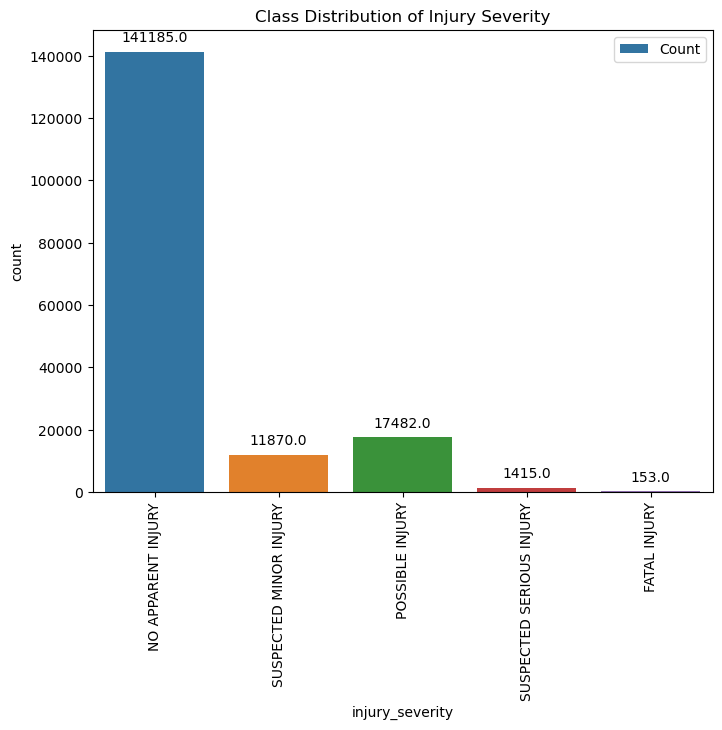

In [11]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='injury_severity', data=data)
plt.title('Class Distribution of Injury Severity')
plt.xticks(rotation=90)  
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(['Count'])
plt.show()

In [9]:
#converting crash_date_time column to datetime datatype and then extracting new features from this.
data['crash_date_time'] = pd.to_datetime(data['crash_date_time'])
data['year']=data['crash_date_time'].dt.year
data['day_of_week'] = data['crash_date_time'].dt.dayofweek
data['month'] = data['crash_date_time'].dt.month
data['hour'] = data['crash_date_time'].dt.hour


In [10]:
import pandas as pd
columns_to_convert = []
for column in data.columns:
    if pd.to_numeric(data[column], errors='coerce').notna().all():
        columns_to_convert.append(column)
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [12]:
columns_to_drop=[":@computed_region_a9cs_3ed7",':@computed_region_r648_kzwt',
       ':@computed_region_vu5j_pcmz',
       ':@computed_region_tx5f_5em3',':@computed_region_kbsp_ykn9',':@computed_region_d7bw_bq6x',':@computed_region_rbt8_3x7n', 'person_id',
        'crash_date_time',':@computed_region_6vgr_duib','geolocation','related_non_motorist','non_motorist_substance_abuse','off_road_description','report_number', 'local_case_number', 'agency_name','circumstance','driver_distracted_by','drivers_license_state','vehicle_id','vehicle_continuing_dir','vehicle_going_dir','driverless_vehicle','parked_vehicle','vehicle_model','equipment_problems','route_type','road_name','cross_street_type','cross_street_name','municipality']

In [13]:
data=data.drop(columns=columns_to_drop)

In [14]:
# Replacing duplicates with original names
make_mapping = {
    'TOY': 'TOYOTA',
    'MER': 'MERCEDES BENZ',
    'SUZ': 'ISUZU',
    'NIS': 'NISSAN',
    'HY': 'HYUNDAI',
    'KIA':'KIA','BMW':'BMW','JEE':'JEEP','YA':'YAMAHA','AU':'AUDI',
    'LEX': 'LEXUS',
    'POR': 'PORSCHE',
    'FOR': 'FORD',
    'HON': 'HONDA',
    'MAZ': 'MAZDA',
    'DOD': 'DODGE',
    'CAD': 'CADILLAC',
    'INF': 'INFINITY',
    'LIN': 'LINCOLN',
    'HAR': 'HARLEY DAVIDSON',
    'LAN': 'LAND ROVER',
    'CHE': 'CHEVROLET',
    'SUB': 'SUBARU',
    'CHR': 'CHRYSLER',
    'VOL': 'VOLKSWAGEN',
    'ACU': 'ACURA'
}

data['vehicle_make'] = data['vehicle_make'].apply(lambda x: next((make_mapping[key] for key in make_mapping.keys() if str(x).startswith(key)), 'OTHERS'))


**Checking association between weather and surface_condition**

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['weather'], data['surface_condition'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Squared Value: {chi2}")
print(f"P-value: {p}")


Chi-Squared Value: 244251.22652895475
P-value: 0.0


In [16]:
#creating a new feature which shows size of vehicle either light or heavy.
size_mapping = {
    'PASSENGER CAR': 'Light',
    '(SPORT) UTILITY VEHICLE': 'Heavy',
    'MOTORCYCLE': 'Light',
    'SNOWMOBILE': 'Light',
    'ALL TERRAIN VEHICLE (ATV)': 'Light',
    'AUTOCYCLE': 'Light',
    'LOW SPEED VEHICLE': 'Light',
    'OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)': 'Light',
    'CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))': 'Light',
    'POLICE VEHICLE/EMERGENCY': 'Light',
    'MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))': 'Light',
}

data['vehicle_size'] = data['vehicle_body_type'].map(size_mapping).fillna('Heavy')

In [17]:
df=data.copy()

In [ ]:
#replacing rows with N/A with UNKNOWN. N/A is not same as NaN.
df['light'] = df['light'].replace('N/A', 'UNKNOWN')
df['traffic_control'] = df['traffic_control'].replace('N/A', 'UNKNOWN')
df['driver_substance_abuse'] = df['driver_substance_abuse'].replace('N/A', 'UNKNOWN')
df['vehicle_damage_extent'] = df['vehicle_damage_extent'].replace('N/A', 'UNKNOWN')
df['vehicle_body_type'] = df['vehicle_body_type'].replace('N/A', 'UNKNOWN')
df['vehicle_movement'] = df['vehicle_movement'].replace('N/A', 'UNKNOWN')


**Next Steps**
1) Apply few feature engineering techniques
2) Apply ohe on features and label encoding on target
3) train model with various models
4) try sampling techniques if good accuracy is not acheived
5) Develop an Flask Application where user inputs values to predict severity